In [1]:
import pandas as pd

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [7]:
#from sklearn.ensemble import HistGradientBoostingClassifier
#from sklearn.preprocessing import OrdinalEncoder

#Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv("Dataset.csv")
features.head(5)
# Descriptive statistics for each column
features.describe()
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['hospital_death'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('encounter_id', axis = 1)
features= features.drop('patient_id', axis = 1)
features= features.drop('hospital_id', axis = 1)
features= features.drop('icu_id', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy="mean")
train_features = imp.fit_transform(train_features)
test_features = imp.transform(test_features)



In [11]:
#Write train dataset and test dataset into dataframe
df = pd.DataFrame(features,columns = feature_list)
df.to_csv(index=False)
dftrain = pd.DataFrame(train_features,columns = feature_list)
dftest = pd.DataFrame(test_features,columns = feature_list)

In [11]:
dftrain.to_csv(index=False)
dftest.to_csv(index=False)

In [12]:
#output the dataframe into zip
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts) 

In [13]:
compression_opts = dict(method='zip',
                        archive_name='outtrain.csv')  
dftrain.to_csv('outtrain.zip', index=False,
          compression=compression_opts) 
compression_opts = dict(method='zip',
                        archive_name='outtest.csv')  
dftest.to_csv('outtest.zip', index=False,
          compression=compression_opts) 

In [12]:
#balanced random forest 
clf = RandomForestClassifier(max_depth=2,class_weight="balanced", n_jobs=2, random_state=0)
clf.fit(train_features, train_labels)

print(clf.score(test_features, test_labels))

# Create our predictions
prediction = clf.predict(test_features)



0.8701208077107593


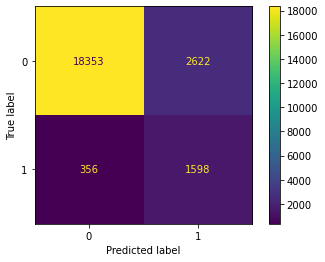

In [15]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score,roc_auc_score
confusion_matrix(test_labels, prediction)
cm = confusion_matrix(test_labels, prediction, labels=clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [16]:
# Display accuracy score
accuracy_score(test_labels, prediction)


0.8701208077107593

In [17]:
# Display roc_auc_score
roc_auc_score(test_labels,prediction)

0.8464018309070481

In [18]:
# Display precision score
precision_score(test_labels,prediction)

0.37867298578199055

In [19]:
# Display recall score
recall_score(test_labels,prediction)

0.8178096212896623

In [20]:
# Display F1 score
f1_score(test_labels,prediction)

0.517654680919987

In [26]:
# import function
from sklearn.tree import export_graphviz 
import pydot
# pick one tree in the forest
tree = clf.estimators_[5]
# output the graph
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# create dot document
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# write into png
graph.write_png('tree.png')

In [27]:
# get feature's importance
importances = list(clf.feature_importances_)
# make the features into list
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# sort as features importance
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# print out the features importance
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: apache_4a_hospital_death_prob Importance: 0.14
Variable: hospital_death       Importance: 0.11
Variable: apache_4a_icu_death_prob Importance: 0.09
Variable: ventilated_apache    Importance: 0.06
Variable: gcs_motor_apache     Importance: 0.05
Variable: d1_sysbp_noninvasive_min Importance: 0.05
Variable: d1_arterial_ph_min   Importance: 0.04
Variable: gcs_verbal_apache    Importance: 0.03
Variable: d1_sysbp_min         Importance: 0.03
Variable: d1_bun_max           Importance: 0.03
Variable: d1_lactate_min       Importance: 0.03
Variable: gcs_eyes_apache      Importance: 0.02
Variable: d1_mbp_min           Importance: 0.02
Variable: d1_mbp_noninvasive_min Importance: 0.02
Variable: d1_spo2_min          Importance: 0.02
Variable: d1_temp_min          Importance: 0.02
Variable: d1_creatinine_max    Importance: 0.02
Variable: d1_lactate_max       Importance: 0.02
Variable: d1_arterial_pco2_min Importance: 0.02
Variable: d1_arterial_po2_min  Importance: 0.02
Variable: elective_su

In [81]:
#random forest without weighted
clf2 = RandomForestClassifier(max_depth=2, n_jobs=2, random_state=0)
clf2.fit(train_features, train_labels)

print(clf2.score(test_features, test_labels))

# Create our predictions
prediction2 = clf2.predict(test_features)


0.9169174407954992


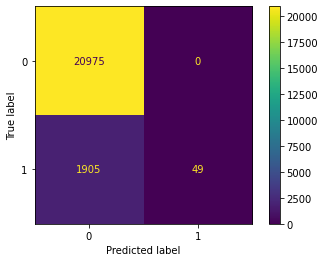

In [82]:
# Create confusion matrix
confusion_matrix(test_labels, prediction2)
cm2 = confusion_matrix(test_labels, prediction2, labels=clf.classes_)
disp2= ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf.classes_)
disp2.plot()
plt.show()

In [43]:
# Display accuracy score
accuracy_score(test_labels,prediction2)

0.9169174407954992

In [36]:
# Display roc_auc_score
roc_auc_score(test_labels,prediction2)

0.5125383828045036

In [44]:
# Display precision score
precision_score(test_labels,prediction2)

1.0

In [83]:
# Display recall score
recall_score(test_labels,prediction2)

0.025076765609007165

In [35]:
# Display F1 score
f1_score(test_labels,prediction2)

0.04892661008487269